# Purpose:
The purpose of this Notebook is to explain how the code for this project has been designed and how it can be used.

# Code Sections:

## Nuclide Class:
The Nuclide class is a simple data storage class used to store all relevant nuclide information. Properties like halflife, intitial concentration, external production, and parent nuclides are all stored within the nuclide class. Additional parameters like halflife and production units, allow for for automatic conversion of these properties into common units.


## DecaySolver Class:
The DecaySolver class is what actually calculates the decay of a nuclide chain. The DecaySolver class intakes a dictionary of Nuclide class instances and processes the decay chain using Eulers method. Additional paramters like save location, plot data, and the timestep are inputs into the DecaySolver Class

## Error Analysis Utils

The Nuclide and DecaySolver classes still have limitations in terms of calculating a numerically determined equilibrium value, or plotting error. Unlike the DecaySolver and Nuclide classes, the functions written in the error_analysis_utils.py file are specifically meant for code validation, using nuclides A and B.


# Code Validation:

## Making Nuclide and DecaySolver Classes:

In [6]:
# initial imports

from nuclide_class import Nuclide
from decay_solver import DecaySolver
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

0.009627044174443685
0.0057762265046662105
Current directory: /Users/jonathantill/PycharmProjects/NE301_Project1


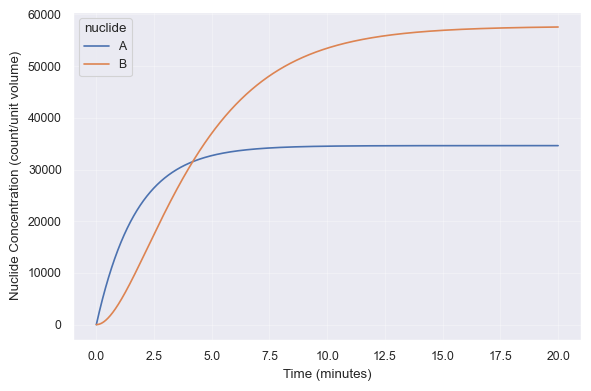

In [8]:
# Making a nuclide instance:

from nuclide_class import Nuclide
from decay_solver import DecaySolver
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


nuclide_a = Nuclide(name="A",
                    half_life=1.2,
                    half_life_unit="minutes",
                    parents = None,
                    external_prod_rate=20000,
                    prod_rate_unit_time="minutes",
                    time=0.0,
                    n_0 = 0.0
                    )

nuclide_b = Nuclide(name="B",
                    parents=["A"],
                    half_life=2.0,
                    half_life_unit="minutes",
                    time=0.0,
                    n_0 = 0
                    )



# Nuclide properteis can be accessed as follows:
print(nuclide_a.decay_const)
print(nuclide_b.decay_const)

# Using the DecaySolver class
#Nuclides must be placed into a dictionary before being input into the DecaySolver class.
# If a nuclide needs to be added later, that can be done with the add_nuclide() method.

nuclides = {f"{nuclide_a.name}": nuclide_a,
            f"{nuclide_b.name}": nuclide_b}


import os

# Get the current working directory
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")


# Specifying the timestep for the DecaySolver
timestep = 0.05

solver = DecaySolver(nuclides=nuclides,
                           timestep=timestep,
                           timestep_unit="seconds",
                           duration=20.0,
                           duration_unit="minutes",
                           plot_data=True,
                           save_data=True,
                           data_dir=".",
                           save_name=f"demo_ab"
                           )


# Once the class has been instantiated, all that needs to be done is run the solver
solver.run()


## Validating Numerical Solutions and Plotting Equilibrium Values

In [3]:
# Using the functions in error_analysis_utils.py the model performance can be evaluated for nuclides A and B

timestep = 0.05
decay_solver = DecaySolver(nuclides=nuclides,
                           timestep=timestep,
                           timestep_unit="seconds",
                           duration=20.0,
                           duration_unit="minutes",
                           plot_data=False,
                           save_data=True,
                           data_dir= "/Users/jonathantill/PycharmProjects/NE301_Project1/data",
                           save_name=f"timestep_{timestep}"
                           )



decay_solver.run()